# K-Nearest Neighbours (KNN) ON Titanic Survival

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> To determine if a passenger on the Titanic survived or not.

### b) Defining the Metric for Success

> The project is considered a success once we settle on a model that can predict the survival of a passenger with high accuracy.

### c) Understanding the context 

> The context of the study is based on a tradegy that befell the titanic ship. The ship was a passenger ship that was used to transport people across the ocean. 

### d) Recording the Experimental Design

1. Randomly partition each dataset into two parts i.e 80 - 20 sets.

2. For dataset 1, because we don't have the label for the test set, we will use the train set to create train and test data (i.e. splitting further), then perform K-nearest neighbor classification.

3. Compute the accuracy (percentage of correct classification).

4. Report the confusion matrix of each classifier.

5. Repeat step 2 to step 4 twice, each time splitting the datasets differently i.e. 70-30, 60-40, then note the outcomes of your modeling.

6. Suggest and apply at least one of the optimization techniques that you learned earlier this week.

7. Provide further recommendations to improve the classifier.

### e) Data Relevance

The dataset glossary:

survival - Survival (0 = No; 1 = Yes)

class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

name - Name

sex - Sex

age - Age

sibsp - Number of Siblings/Spouses Aboard

parch - Number of Parents/Children Aboard

ticket - Ticket Number

fare - Passenger Fare

cabin - Cabin

embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

boat - Lifeboat (if survived)

body - Body number (if did not survive and body was recovered)

## 2. Reading the Data

In [310]:
# let's import the libraries we need for this project, KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [139]:
# let's read the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## 3. Checking the Data

In [140]:
# Determining the no. of rows and columns in the data
print('The number of rows in the train data is:', train.shape[0], 'and the number of columns is:', train.shape[1])
print('The number of rows in the test data is:', test.shape[0], 'and the number of columns is:', test.shape[1])

The number of rows in the train data is: 891 and the number of columns is: 12
The number of rows in the test data is: 418 and the number of columns is: 11


In [141]:
# Previewing the top of our first dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [142]:
# previewing the tail of our first dataset
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [143]:
# Previewing the top of our second dataset
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [144]:
# Previewing the tail of our second dataset
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [145]:
# Checking whether each column has an appropriate datatype in the first dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


> The cabin and age columns have alot of missing values.

In [146]:
# Checking whether each column has an appropriate datatype in the second dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


> Age and cabin columns in the test dataset also have alot of missing values.

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

### a.Validation

## 5. Tidying the Dataset

In [148]:
# let's drop passengerid and ticket column as they are not of importance to the study
train.drop(['PassengerId', 'Ticket'], axis=1, inplace=True)
test.drop(['PassengerId', 'Ticket'], axis=1, inplace=True)

> The passengerId column and Ticket columns have been dropped as they are not relevant to the study for both train and test datasets.

In [150]:
# let's write a function to check the percentage of missing values in each column
def missing_values_table(df):
    # let's create a for loop to iterate through each column while checking the missing values
    for col in df.columns:
        missing_data = df[col].isnull().sum()
        # let's print the percentage of missing values in each column
        if missing_data > 0:
            print(f'{col} has {missing_data/df.shape[0]*100}% missing values')

In [151]:
# missing values for train
missing_values_table(train)

Age has 19.865319865319865% missing values
Cabin has 77.10437710437711% missing values
Embarked has 0.22446689113355783% missing values


> Cabin column has more than 75% missing values for train and so it will be dropped.

In [152]:
# missing values for test
missing_values_table(test)

Age has 20.574162679425836% missing values
Fare has 0.23923444976076555% missing values
Cabin has 78.22966507177034% missing values


> Again cabin has a 75% missing values for test dataset so it will be dropped.

In [153]:
# let's drop cabin column
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

> The age, cabin and embarked columns are missing a lot of data.

In [159]:
# let's fill the missing values for the remaining columns with the 
# column mean or the highest frequency value
# for train
train['Age'].fillna(train['Age'].mean(), inplace=True)
train['Fare'].fillna(train['Fare'].mean(), inplace=True)
train['Embarked'].fillna('S', inplace=True)

In [160]:
# for test
test['Age'].fillna(test['Age'].mean(), inplace=True)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)
test['Embarked'].fillna('S', inplace=True)

In [162]:
# let's check the missing values again
print(missing_values_table(train))
print(missing_values_table(test))

None
None


> The datasets are rid of missing values and ready to be used for the analysis.

In [163]:
# let's select all categorical columns in the first dataset
categorical_columns_train = train.select_dtypes(include=['object']).columns
categorical_columns_train

Index(['Name', 'Sex', 'Embarked'], dtype='object')

In [164]:
# let's select all numerical columns from the first dataset and store it in a variable
numerical_cols_train = train.select_dtypes(include=['number']).columns
numerical_cols_train

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [167]:
# let's select all categorical columns in the second dataset
categorical_columns_test = test.select_dtypes(include=['object']).columns
categorical_columns_test

Index(['Name', 'Sex', 'Embarked'], dtype='object')

In [168]:
# let's select all numerical columns from the second dataset and store it in a variable
numerical_cols_test = test.select_dtypes(include=['number']).columns
numerical_cols_test

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [169]:
# Checking for Outliers
# let's create a function to check for outliers for each column and print the results as a percentage the the total percentage of the data
# let's create a function that checks for the percentage of outliers in a dataset using Interquartile range

def check_outliers(df):

    # instantiate the quantile variables

    Quantile_1, Quantile_2, Quantile_3 = 0, 0, 0

    # converting to dataframe

    check_outliers = pd.DataFrame()

    # let's get the numerical columns

    num_cols = df.select_dtypes(include=['int64', 'float64'])

    # getting the quantiles from the numerical columns

    Quantile_1 = num_cols.quantile(0.25)

    Quantile_3 = num_cols.quantile(0.75)

    # let's get the IQR

    IQR = Quantile_3 - Quantile_1

    # let's get the outliers

    check_outliers = num_cols[((num_cols < (
        Quantile_1 - 1.5 * IQR)) | (num_cols > (Quantile_3 + 1.5 * IQR))).any(axis=1)]

    # printing the number of outliers and the percentage of outliers

    print('There are {} outliers in the dataset.'.format(
        check_outliers.shape[0]))

    print('The percentage of outliers in the dataset is {}%.'.format(
        round((check_outliers.shape[0] / df.shape[0]) * 100, 2)))


In [170]:
# checking for outliers in the first dataset
check_outliers(train)

There are 314 outliers in the dataset.
The percentage of outliers in the dataset is 35.24%.


> The first dataframe has 35.24% of outliers

> We wont drop any outlier because it is a crucial dataset. We are focused on the survival rate of the titanic tragedy.

In [171]:
# checking for outliers in the second dataset
check_outliers(test)

There are 137 outliers in the dataset.
The percentage of outliers in the dataset is 32.78%.


> The second dataframe has 32.78% of outliers

> We wont drop any outlier because it is a crucial dataset.

In [172]:
# checking for duplicates in the first dataset
train.duplicated().sum()

0

> The first daaset has no duplicates.

In [173]:
# checking for duplicates in the second dataset
test.duplicated().sum()

0

> The second dataset has no duplicates.

In [174]:
# More data cleaning procedures
# let's check if the columns have been named correctly
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [175]:
# let's check if the columns have been named correctly
test.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

> Columns for both datasets have been named properly.

In [176]:
# let's export the first dataset to a csv file
train.to_csv('train_cleaned.csv')

# let's export the second dataset to a csv file
test.to_csv('test_cleaned.csv')

> We are exporting the cleaned datasets to csv files for convenience.

In [177]:
# let's read the cleaned data
Train = pd.read_csv('train_cleaned.csv')
Test = pd.read_csv('test_cleaned.csv')

> Reading the cleaned datasets from csv files.

In [180]:
# previewing the first dataset
Train.head()

# let's drop Unnamed: 0 column from the first dataset
Train.drop(['Unnamed: 0'], axis=1, inplace=True)
Train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [181]:
# previewing the second dataset
Test.head()

# let's drop Unnamed: 0 columns from the second dataset
Test.drop(['Unnamed: 0'], axis=1, inplace=True)
Test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


## 6. Exploratory Analysis

#### *a) Univariate Analysis*

In [182]:
# let's select all categorical columns in the first dataset
categorical_columns_train = Train.select_dtypes(include=['object']).columns.to_list()
categorical_columns_train

['Name', 'Sex', 'Embarked']

In [184]:
# let's select all numerical columns from the first dataset and store it in a variable
numerical_cols_train = Train.select_dtypes(include=['number']).columns.to_list()
numerical_cols_train

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [185]:
# let's select all categorical columns in the second dataset
categorical_columns_test = Test.select_dtypes(include=['object']).columns.to_list()
categorical_columns_test

['Name', 'Sex', 'Embarked']

In [186]:
# let's select all numerical columns from the second dataset and store it in a variable
numerical_cols_test = Test.select_dtypes(include=['number']).columns.to_list()
numerical_cols_test

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [187]:
# let's create a function for plotting the categorical data
def plot_categorical(column, df):
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.countplot(df[column], orient='v')
    plt.title('Bar Plot of {}'.format(column))
    # let's add a color to our bars
    plt.setp(ax.patches, alpha=0.6, linewidth=1, edgecolor='black')

    plt.xlabel('{}'.format(column))
    plt.ylabel('Count')
    plt.show()

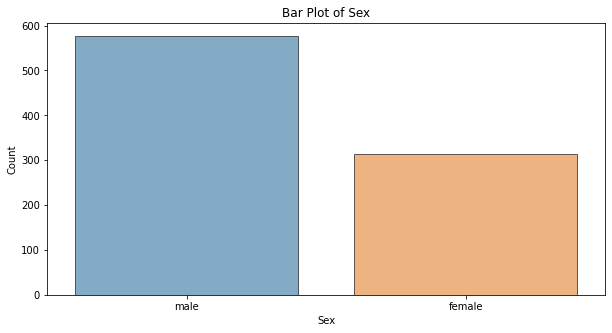

In [188]:
######### FOR TRAIN DATASET #########
#####################################

# let's plot bar plot for sex
plot_categorical(categorical_columns_train[1], Train)


> There were more males than females in the Titanic

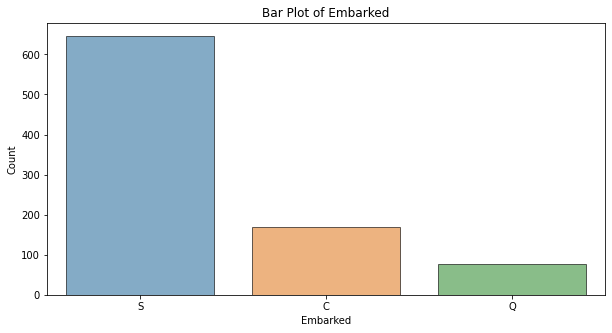

In [191]:
# let's plot a bar plot of embarked
plot_categorical(categorical_columns_train[2], Train)

> Most people embarked from the port of Southhampton followed by those from Cherbourg and lastly Queenstown.

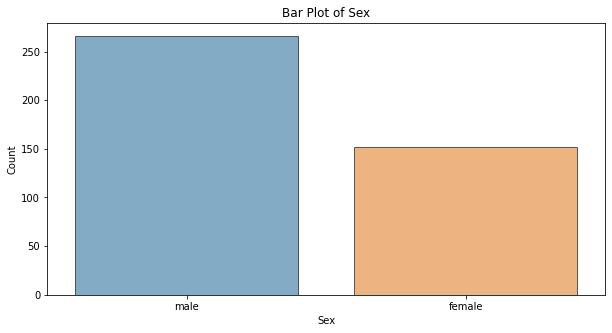

In [192]:
######### FOR TEST DATASET #########
#####################################

# let's plot bar plot for sex
plot_categorical(categorical_columns_train[1], Test)

> There were more males than females in the test dataset too.

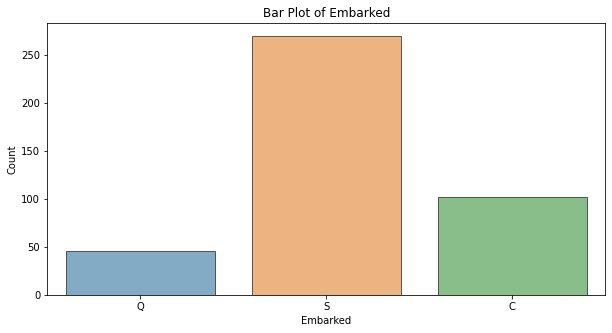

In [193]:
# let's plot a bar plot of embarked
plot_categorical(categorical_columns_train[2], Test)


> More people embarked from the port of Southhampton followed by those from Cherbourg and lastly Queenstown.

In [194]:
# let's write a function to plot a distribution plot and a box plot for numerical data
def plot_distribution(column, df):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    # let's plot a distribution plot
    sns.distplot(df[column], hist=True, ax=ax[0])
    ax[0].set_title('Distribution Plot of {}'.format(column))
    ax[0].set_xlabel('{}'.format(column))
    ax[0].set_ylabel('Frequency')

    # let's plot a box plot
    sns.boxplot(df[column], ax=ax[1])
    ax[1].set_title('Box Plot of {}'.format(column))
    ax[1].set_xlabel('{}'.format(column))
    ax[1].set_ylabel('Frequency')
    plt.show()

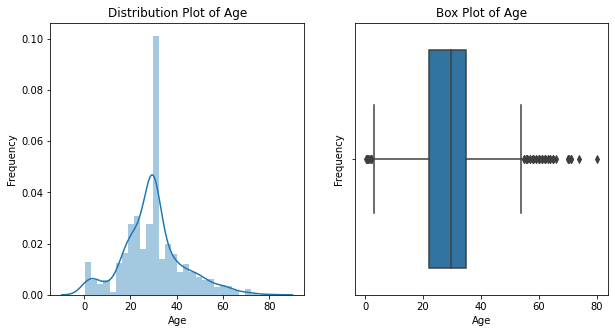

In [196]:
######### FOR TRAIN DATASET #########
#####################################

# let's plot a distribution plot for age
plot_distribution(numerical_cols_train[2], Train)

> Most people were 30 years old but there were some who were above 60 years.

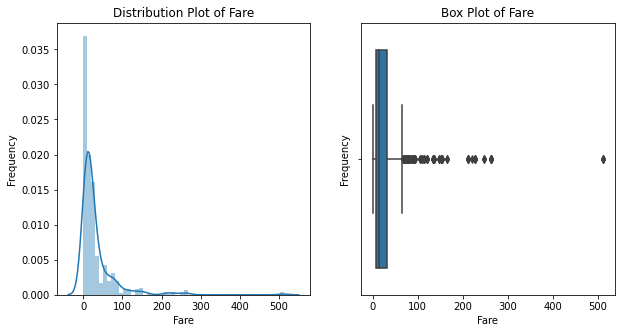

In [198]:
# let's plot a distribution plot for age
plot_distribution(numerical_cols_train[5], Train)

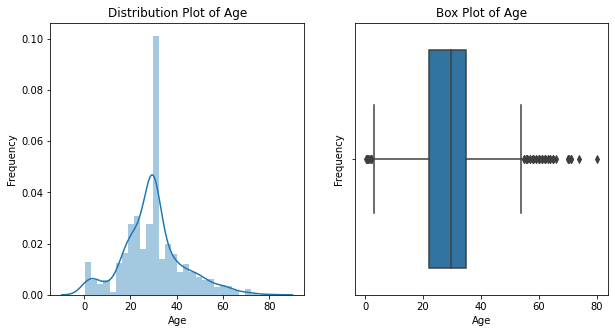

In [199]:
########### FOR TEST DATASET #########
#####################################

# let's plot a distribution plot for age
plot_distribution(numerical_cols_test[1], Train)


> Most people were 30 years old but there were some who were above 60 years.

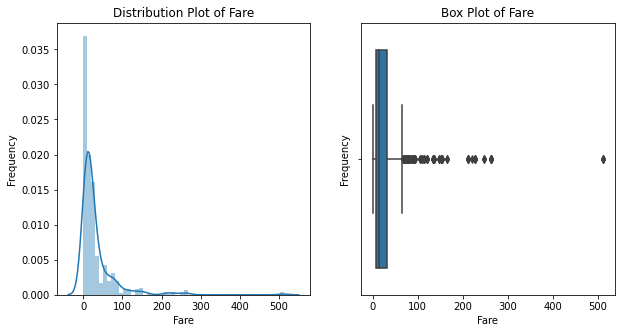

In [200]:
# let's plot a distribution plot for fare
plot_distribution(numerical_cols_test[4], Train)

#### *b) Bivariate Analysis*

In [202]:
# let's create a function to plot a crosstab
def crosstab(x, y, rot, df):
    graph = pd.crosstab(df[x], df[y])
    graph.plot.bar(stacked=True)
    plt.xticks(rotation=rot)
    plt.title('Bar plot of {} vs {}'.format(x, y))
    plt.xlabel('{}'.format(x))
    plt.ylabel('{}'.format(y))
    plt.show()

In [205]:
# a function to calculate pearson correlation
def pearson_correlation(x, y, df):
    corr = df[[x, y]].corr()
    print('The Pearson correlation between {} and {} is {}'.format(x, y, corr.iloc[0,1]))

In [206]:
# let's create a function to create a pairplot
def pairplot(df):
    columns = df.columns.values
    plot = sns.pairplot(df, vars=columns, palette='Set1')
    plot.fig.suptitle(f'Pairplot of {columns[0]} vs {columns[1]}')
    plt.show()
    pearson_correlation(columns[0], columns[1], df)

In [207]:
############ Categorical-Categorical #############
##################################################

# let's preview the first dataset categorical columns
categorical_columns_train

['Name', 'Sex', 'Embarked']

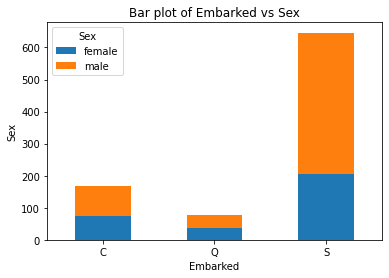

In [210]:
# a crosstab of sex against embarked
crosstab(categorical_columns_train[2], categorical_columns_train[1], 0, Train)


> More male than female boarded the ship at the Southampton port.

In [211]:
# let's preview the second dataset categorical columns
categorical_columns_test

['Name', 'Sex', 'Embarked']

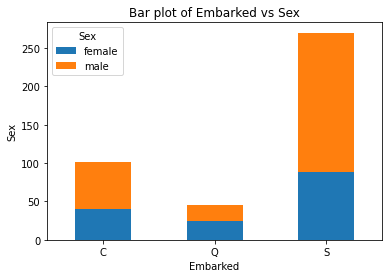

In [212]:
# a crosstab of sex against embarked
crosstab(categorical_columns_train[2], categorical_columns_train[1], 0, Test)

> More male than female boarded the ship at the Southampton port.

In [214]:
########## Numerical-Numerical #####################
############# Train  ###############################

# let's see the numerical columns in the first dataset
numerical_cols_train

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

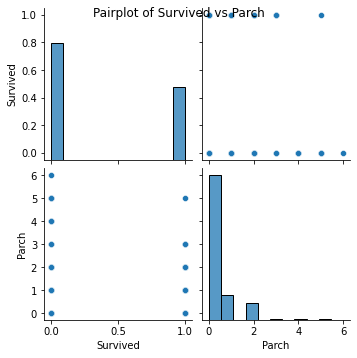

The Pearson correlation between Survived and Parch is 0.08162940708348308


In [224]:
# let's plot a pairplot of age vs fare
pairplot(Train[['Survived', 'Parch']])


> Survived has a weak positive correlation with the number of parents or children on board.

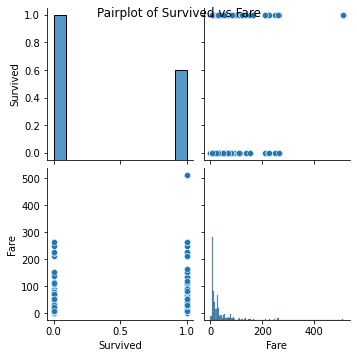

The Pearson correlation between Survived and Fare is 0.25730652238496227


In [219]:
# let's plot a pairplot of fare vs survived
pairplot(Train[['Survived', 'Fare']])

> Survived and Fare have a weak positive correlation with each other.

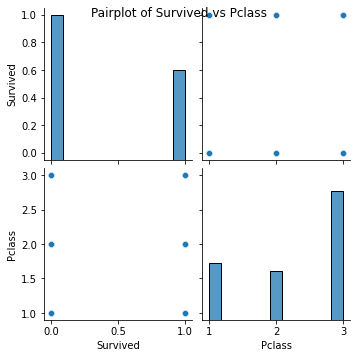

The Pearson correlation between Survived and Pclass is -0.33848103596101214


In [220]:
# let's plot a pairplot of survived vs pclass
pairplot(Train[['Survived', 'Pclass']])

* Survived and the passenger class have a weak negative correlation.

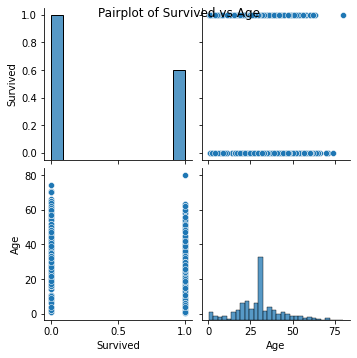

The Pearson correlation between Survived and Age is -0.06980851528714298


In [221]:
# let's plot a pairplot of survived vs age
pairplot(Train[['Survived', 'Age']])

* Survived and the passenger's age have a very weak negative correlation.

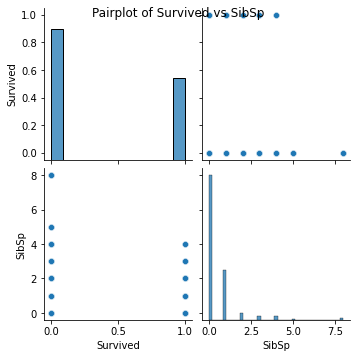

The Pearson correlation between Survived and SibSp is -0.03532249888573587


In [222]:
# let's plot a pairplot of survived vs sibsp
pairplot(Train[['Survived', 'SibSp']])

> Survived and a passenger's number of siblings or spouses aboard have a weak negative correlation.

In [215]:
######### Test #############################

# let's see the numerical columns in the second dataset
numerical_cols_test

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

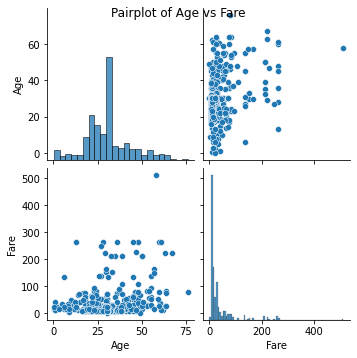

The Pearson correlation between Age and Fare is 0.3267996291636279


In [225]:
# let's plot a pairplot of age vs fare
pairplot(Test[['Age', 'Fare']])

> The age and fare have a fairly weak positive correlation.

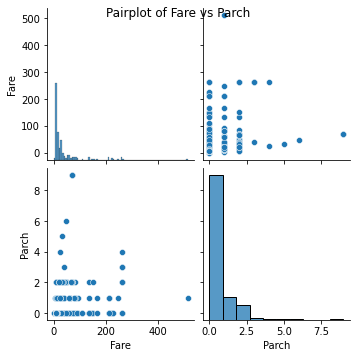

The Pearson correlation between Fare and Parch is 0.23000135403100763


In [226]:
# let's plot a pairplot of fare vs Parch
pairplot(Test[['Fare', 'Parch']])

> The fare and number of parents or children on board have a fairly weak positive correlation.

In [228]:
######## Numerical-Categorical #####################
####################################################

# let's write a function to plot a bar plot
def bar_plot(x, y, df):
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.barplot(df[x], df[y])
    plt.title('Bar plot of {} vs {}'.format(x, y))
    plt.xlabel('{}'.format(x))
    plt.ylabel('{}'.format(y))
    plt.show()

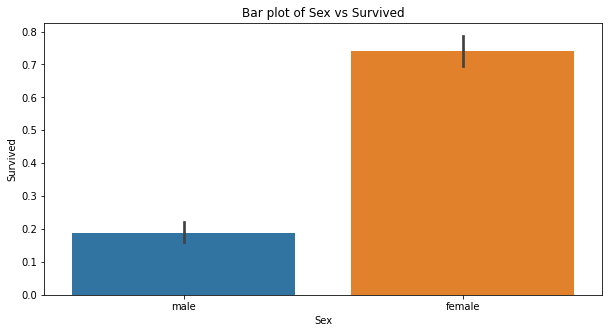

In [234]:
# let's plot a bar plot of age vs survived
bar_plot('Sex', 'Survived', Train)

> More females than males survived the tragedy.

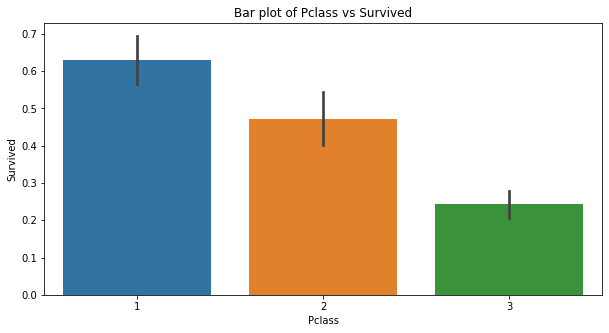

In [237]:
# let's plot a bar plot of survived vs pclass
bar_plot('Pclass', 'Survived', Train)

> More people on first class and second class survived, people on third class who survived were very few.

Text(0.5, 1.0, 'Correlation Heatmap')

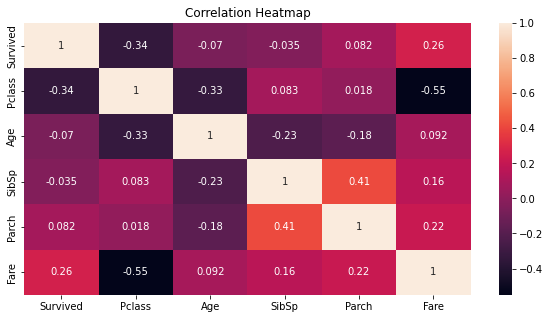

In [243]:
# let's plot a heatmap for the train dataset
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(Train.corr(), annot=True)
plt.title('Correlation Heatmap')

Text(0.5, 1.0, 'Correlation Heatmap')

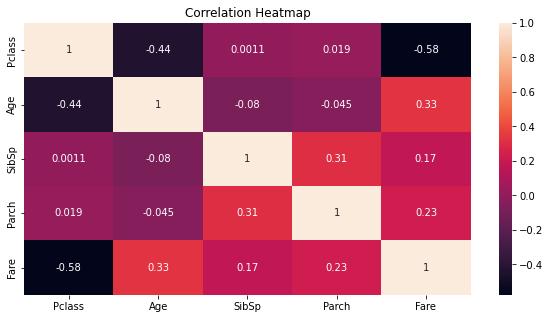

In [244]:
# let's plot a heatmap for the test dataset
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(Test.corr(), annot=True)
plt.title('Correlation Heatmap')


#### *c) Multivariate Analysis*

In [248]:
###### Multicolinearity #############################
#####################################################

Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

VIF=\frac{1}{1-R^2}

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

As we see from the formula, greater the value of R-squared, greater is the VIF. Hence, greater VIF denotes greater correlation. This is in agreement with the fact that a higher R-squared value denotes a stronger collinearity. Generally, a VIF above 5 indicates a high multicollinearity.

In [249]:
# let's create a function to get the vif

def VIF(data):
  # Correlation matrix
  correlation = data.corr()
  # Inverse matrix
  inv_corr = pd.DataFrame(np.linalg.inv(
      correlation.values), index=correlation.index, columns=correlation.columns)
  return inv_corr


In [250]:
# vif
VIF(Train)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.197125,0.425511,0.244349,0.116085,-0.089220,-0.095825
Pclass,0.425511,1.804657,0.499732,-0.107711,-0.124163,0.880457
Age,0.244349,0.499732,1.244878,0.209250,0.097764,0.043195
SibSp,0.116085,-0.107711,0.209250,1.285520,-0.456860,-0.214667
Parch,-0.089220,-0.124163,0.097764,-0.456860,1.272039,-0.256331
Fare,-0.095825,0.880457,0.043195,-0.214667,-0.256331,1.594209


> There isn't any VIF above 5 so we can safely say that there is no multicollinearity.

## 7. Implementing the Solution

### • KNN 80-20

In [ ]:
# let's drop name. it is not useful
Train.drop(['Name'], axis=1, inplace=True)
Test.drop(['Name'], axis=1, inplace=True)

In [287]:
# let's preview the first dataset
Train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [288]:
# let's use get dummies to create dummy variables
Train = pd.get_dummies(Train)
Train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [289]:
# let's select our xand y variables
X = Train.drop(['Survived'], axis=1)
y = Train.Survived

# let's split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [290]:
# train the model
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [291]:
# predict the test set
y_pred = classifier.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.describe()

,Actual,Predicted
count,179.000000,179.000000
mean,0.413408,0.329609
std,0.493826,0.471390
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [292]:
# classification report
from sklearn.metrics import classification_report, confusion_matrix
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.72      0.82      0.76       105
           1       0.68      0.54      0.60        74

    accuracy                           0.70       179
   macro avg       0.70      0.68      0.68       179
weighted avg       0.70      0.70      0.70       179



In [293]:
# evaluation using confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy', accuracy_score(y_test, y_pred))

[[86 19]
 [34 40]]
Accuracy 0.7039106145251397


> With an 80-20 split, our accuracy is 70%

### • KNN 80-20 with optimization

In [324]:
# let's get our x and y
X = Train.drop('Survived', axis=1)
y = Train.Survived

# let's get our train-test-split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)


In [325]:
# training our model
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [326]:
# let's make our predictions
y_pred = classifier.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.describe()


,Actual,Predicted
count,179.000000,179.000000
mean,0.385475,0.324022
std,0.488073,0.469321
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [327]:
# let's create a classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.75      0.83      0.79       110
           1       0.67      0.57      0.61        69

    accuracy                           0.73       179
   macro avg       0.71      0.70      0.70       179
weighted avg       0.72      0.73      0.72       179



In [328]:
# evaluation using confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy', accuracy_score(y_test, y_pred))


[[91 19]
 [30 39]]
Accuracy 0.7262569832402235


> With an 80-20 split, our accuracy is 72%

### • KNN 70-30

In [305]:
# let's create a function to help in standardization
def Standardization(X_train, X_test):
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  return X_train, X_test

In [306]:
# let's create an LDA functin
def Lda(X_train, X_test, y_train, components=None):
  lda = LDA(n_components=components)
  X_train = lda.fit_transform(X_train, y_train)
  X_test = lda.transform(X_test)
  return X_train, X_test

In [294]:
# let's our x and y
X = Train.drop('Survived', axis=1)
y = Train.Survived

# let's get our train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [295]:
# let's train our data
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [296]:
# let's make our predictions
y_pred = classifier.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.describe()

,Actual,Predicted
count,268.000000,268.000000
mean,0.373134,0.320896
std,0.484542,0.467694
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [297]:
# let's create our classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       168
           1       0.65      0.56      0.60       100

    accuracy                           0.72       268
   macro avg       0.70      0.69      0.70       268
weighted avg       0.72      0.72      0.72       268



In [298]:
# let's evaluate our model
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy', accuracy_score(y_test, y_pred))

[[138  30]
 [ 44  56]]
Accuracy 0.7238805970149254


> The 70-30 model gives a 72% accuracy score.

### • KNN 70-30 with optimization

In [318]:
# let's get our x and y
X = Train.drop('Survived', axis=1)
y = Train.Survived

# let's get our train-test-split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)


In [319]:
# training our model
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [320]:
# let's make our predictions
y_pred = classifier.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.describe()


,Actual,Predicted
count,268.000000,268.000000
mean,0.373134,0.320896
std,0.484542,0.467694
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [321]:
# let's create a classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.76      0.82      0.79       168
           1       0.65      0.56      0.60       100

    accuracy                           0.72       268
   macro avg       0.70      0.69      0.70       268
weighted avg       0.72      0.72      0.72       268



In [322]:
# evaluation using confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy', accuracy_score(y_test, y_pred))


[[138  30]
 [ 44  56]]
Accuracy 0.7238805970149254


> The 70-30 model with optimization gives a 72% accuracy score.

### • KNN 60-40

In [300]:
# let's get our x and y
X = Train.drop('Survived', axis=1)
y = Train.Survived

# let's get our train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [301]:
# training our model
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [302]:
# let's make our predictions
y_pred = classifier.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.describe()

,Actual,Predicted
count,357.000000,357.000000
mean,0.380952,0.336134
std,0.486302,0.473049
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [303]:
# let's create a classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       221
           1       0.64      0.57      0.60       136

    accuracy                           0.71       357
   macro avg       0.70      0.69      0.69       357
weighted avg       0.71      0.71      0.71       357



In [285]:
# evaluation using confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy', accuracy_score(y_test, y_pred))


[[178  43]
 [ 59  77]]
Accuracy 0.7142857142857143


> A 60-40 split gives a 71% accuracy

### • KNN 60-40 with optimization

In [304]:
# let's get our x and y
X = Train.drop('Survived', axis=1)
y = Train.Survived

# let's get our train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [312]:
# let's conduct standardization
X_train, X_test = Standardization(X_train, X_test)

# let's perform lda
X_train, X_test = Lda(X_train, X_test, y_train, components=None)

In [313]:
# training our data
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [314]:
# let's make our predictions
y_pred = classifier.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.describe()

,Actual,Predicted
count,357.000000,357.000000
mean,0.380952,0.341737
std,0.486302,0.474957
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [315]:
# let's create a classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       221
           1       0.72      0.65      0.68       136

    accuracy                           0.77       357
   macro avg       0.76      0.75      0.75       357
weighted avg       0.77      0.77      0.77       357



In [316]:
# evaluation using confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy', accuracy_score(y_test, y_pred))

[[187  34]
 [ 48  88]]
Accuracy 0.7703081232492998


> A 60-40 split with optimization gives a 77% accuracy

#### Conclusion

> *The best model to use is the 60-40 split with optimization. It gives a 77% accuracy.*

## 8. Challenging the solution

> The solution has been challenged above by using different splits.

## 9. Follow up questions

### a). Did we have the right data?

> Yes, we had the right data. It was a very good dataset.

### b). Do we need other data to answer our question?

> No, we don't need other data to answer our question.

### c). Did we have the right question?

> Yes, we had the right question.